## Case 1: Uncertain initial conditions

In [9]:
using Revise

In [17]:
using ReachabilityAnalysis, Plots

In [24]:
@taylorize function f!(du, u, params, t)
    local a = 0.3
    x, y, z = u[1], u[2], u[3]
    
    du[1] = -(x * y) / (1 + x)
    du[2] = (x * y) / (1 + x) - a * y
    du[3] = a * y
    return du
end

In [43]:
X0 = (9.5 .. 10.0) × (0.01 .. 0.01) × (0.01 .. 0.01)

prob = @ivp(x'= f!(x), dim:3, x(0) ∈ X0);

In [45]:
@time sol = solve(prob, tspan=(0.0, 100.0), alg=TMJets(orderT=8, orderQ=1, adaptive=true));

  1.546268 seconds (38.33 M allocations: 2.319 GiB, 23.85% gc time)


In [46]:
tspan(sol)

[0, 100]

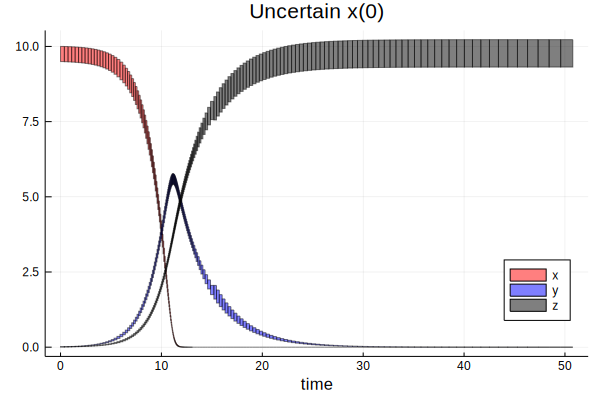

In [47]:
solz = overapproximate(sol, Zonotope)

dt = 0 .. 50
plot(solz(dt), vars=(0, 1), xlab="time", lab="x", color=:red)
plot!(solz(dt), vars=(0, 2), lab="y", color=:blue)
plot!(solz(dt), vars=(0, 3), lab="z", color=:black, legend=:bottomright, title="Uncertain x(0)")

### Objectives

In [68]:
# last set
X = solz(100.0) |> set

positive_orthant = HPolyhedron([HalfSpace([-1.0, 0.0, 0.0], 0.0),   # x >= 0
                                HalfSpace([0.0, -1.0, 0.0], 0.0),   # y >= 0
                                HalfSpace([-1.0, 0.0, 0.0], 0.0)])  # z >= 0

# check that all variables are nonnegative
X ⊆ positive_orthant

true

In [71]:
# compute the volume of the last reach-set
H = overapproximate(X, Hyperrectangle)
volume(H)

6.622208150944385e-19

In [88]:
# check that that 10.0 belongs to the minkowski sum of the reach-sets projected in each coordinate
B = convert(IntervalBox, H) # get the product-of-intervals representation
10 ∈ reduce(+, B.v)

true

## Case 2: Parameter variation

In [110]:
@taylorize function f_pv!(du, u, params, t)
    x, y, z, a = u[1], u[2], u[3], u[4]
    
    du[1] = -(x * y) / (1 + x)
    du[2] = (x * y) / (1 + x) - a * y
    du[3] = a * y
    du[4] = zero(x)
    return du
end

In [114]:
X0 = (9.98 .. 9.98) × (0.01 .. 0.01) × (0.01 .. 0.01) × (0.296 .. 0.304)

prob = @ivp(x'= f_pv!(x), dim:4, x(0) ∈ X0);

In [115]:
@time sol = solve(prob, tspan=(0.0, 100.0), alg=TMJets(orderT=8, orderQ=1, adaptive=true));

  2.355367 seconds (58.03 M allocations: 3.532 GiB, 23.31% gc time)


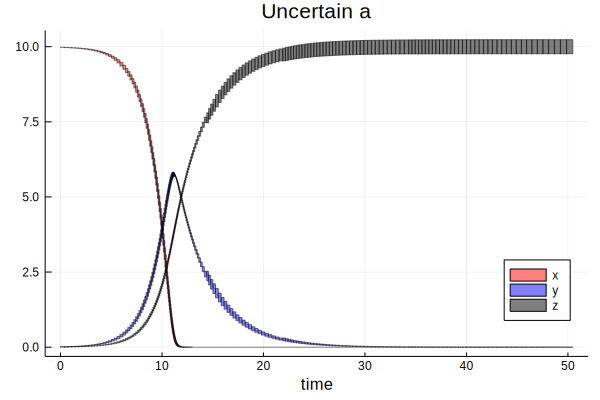

In [92]:
solz = overapproximate(sol, Zonotope)

dt = 0 .. 50
plot(solz(dt), vars=(0, 1), xlab="time", lab="x", color=:red)
plot!(solz(dt), vars=(0, 2), lab="y", color=:blue)
plot!(solz(dt), vars=(0, 3), lab="z", color=:black, legend=:bottomright, title="Uncertain a")

### Objectives

In [101]:
# last set
X = project(solz(100.0), vars=(1, 2, 3)) |> set

positive_orthant = HPolyhedron([HalfSpace([-1.0, 0.0, 0.0], 0.0),   # x >= 0
                                HalfSpace([0.0, -1.0, 0.0], 0.0),   # y >= 0
                                HalfSpace([-1.0, 0.0, 0.0], 0.0)])  # z >= 0

# check that all variables are nonnegative
X ⊆ positive_orthant

true

In [102]:
# compute the volume of the last reach-set
H = overapproximate(X, Hyperrectangle)
volume(H)

1.5262227711502236e-19

In [103]:
# check that that 10.0 belongs to the minkowski sum of the reach-sets projected in each coordinate
B = convert(IntervalBox, H) # get the product-of-intervals representation
10 ∈ reduce(+, B.v)

true

## Case 3: Uncertain initial conditions and parameter variation

In [116]:
GC.gc()

In [117]:
X0 = (9.7 .. 10.0) × (0.01 .. 0.01) × (0.01 .. 0.01) × (0.296 .. 0.304)

prob = @ivp(x'= f_pv!(x), dim:4, x(0) ∈ X0);

In [118]:
@time sol = solve(prob, tspan=(0.0, 100.0), alg=TMJets(orderT=8, orderQ=1, adaptive=true));

  3.252240 seconds (80.16 M allocations: 4.876 GiB, 24.82% gc time)


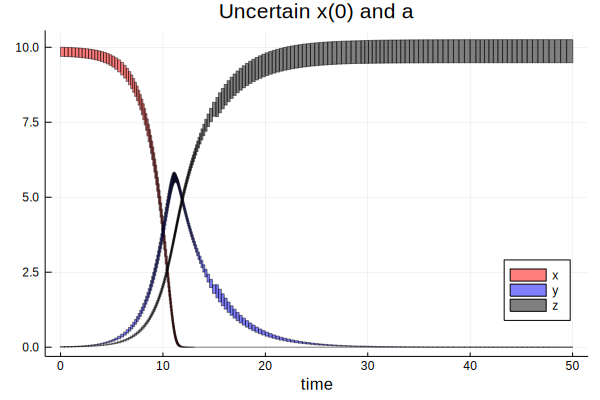

In [106]:
solz = overapproximate(sol, Zonotope)

dt = 0 .. 50
plot(solz(dt), vars=(0, 1), xlab="time", lab="x", color=:red)
plot!(solz(dt), vars=(0, 2), lab="y", color=:blue)
plot!(solz(dt), vars=(0, 3), lab="z", color=:black, legend=:bottomright, title="Uncertain x(0) and a")

### Objectives

In [107]:
# last set
X = project(solz(100.0), vars=(1, 2, 3)) |> set

positive_orthant = HPolyhedron([HalfSpace([-1.0, 0.0, 0.0], 0.0),   # x >= 0
                                HalfSpace([0.0, -1.0, 0.0], 0.0),   # y >= 0
                                HalfSpace([-1.0, 0.0, 0.0], 0.0)])  # z >= 0

# check that all variables are nonnegative
X ⊆ positive_orthant

true

In [108]:
# compute the volume of the last reach-set
H = overapproximate(X, Hyperrectangle)
volume(H)

2.7003907606405257e-19

In [109]:
# check that that 10.0 belongs to the minkowski sum of the reach-sets projected in each coordinate
B = convert(IntervalBox, H) # get the product-of-intervals representation
10 ∈ reduce(+, B.v)

true